In [4]:
#import geopandas as gpd
import geopandas 
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm # for colors
import matplotlib.colors as colors # for more colors

## load data
set path for data folder containing project shapefiles

In [3]:
# get paths to each shapefile in subfolder
#path = '../data/HudsonEstuary/'

create dictionary to use for loading data and later to access each data through loops for plotting and processing

In [15]:
# data={
#     'ms4s': {'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/ms4_outfalls/MS4Outfalls_study_area.shp'},
#     'csos':{'path': '/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/CSOs/CSOs_studyarea.shp'},
#     'bl':{'path': '/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/boatlaunches/boatlaunches_NJ_NY.shp'},
#     'waterbodies':{'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/waterbody_regions/waterbodies.shp'},
#     'ba':{'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/boundingarea/boundingarea.shp'},
#     'sa':{'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/study_area/study_area.shp'},
#     'watershape':{'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/region_water_shape/region_water_shape.shp'},
#     'beaches':{'path':'/Users/saraeichner/Dropbox/github/SAVI_python/python-project/data/HudsonEstuary/Beaches/beaches_merge_1.shp'},
#     'sa_poly':{'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/study_area/study_area_polygon.shp'},
#     'stations':{'path':'/Users/saraeichner/Documents/GitHub/python-project/data/HudsonEstuary/sampling_stations_used_for_analysis/sampling_stations_used_for_analysis.shp'}
# }

# laptop
#/Users/saraeichner/Dropbox/github/SAVI_python
data={
    'ms4s': {'path':'../data/HudsonEstuary/ms4_outfalls/MS4Outfalls_study_area.shp'},
    'csos':{'path': '../data/HudsonEstuary/CSOs/CSOs_studyarea.shp'},
    'bl':{'path': '../data/HudsonEstuary/boatlaunches/boatlaunches_NJ_NY.shp'},
    'waterbodies':{'path':'../data/HudsonEstuary/waterbody_regions/waterbodies.shp'},
    'ba':{'path':'../data/HudsonEstuary/boundingarea/boundingarea.shp'},
    'sa':{'path':'../data/HudsonEstuary/study_area/study_area.shp'},
    'watershape':{'path':'../data/HudsonEstuary/region_water_shape/region_water_shape.shp'},
    'beaches':{'path':'../data/HudsonEstuary/Beaches/beaches_merge_1.shp'},
    'sa_poly':{'path':'../data/HudsonEstuary/study_area/study_area_polygon.shp'},
    'stations':{'path':'../data/HudsonEstuary/sampling_stations_used_for_analysis/sampling_stations_used_for_analysis.shp'}
}
# 
data

{'ms4s': {'path': '../data/HudsonEstuary/ms4_outfalls/MS4Outfalls_study_area.shp'},
 'csos': {'path': '../data/HudsonEstuary/CSOs/CSOs_studyarea.shp'},
 'bl': {'path': '../data/HudsonEstuary/boatlaunches/boatlaunches_NJ_NY.shp'},
 'waterbodies': {'path': '../data/HudsonEstuary/waterbody_regions/waterbodies.shp'},
 'ba': {'path': '../data/HudsonEstuary/boundingarea/boundingarea.shp'},
 'sa': {'path': '../data/HudsonEstuary/study_area/study_area.shp'},
 'watershape': {'path': '../data/HudsonEstuary/region_water_shape/region_water_shape.shp'},
 'beaches': {'path': '../data/HudsonEstuary/Beaches/beaches_merge_1.shp'},
 'sa_poly': {'path': '../data/HudsonEstuary/study_area/study_area_polygon.shp'},
 'stations': {'path': '../data/HudsonEstuary/sampling_stations_used_for_analysis/sampling_stations_used_for_analysis.shp'}}

load shapefiles as geodataframes from dictionary

In [22]:
for k, v in data.items():
    gdf = geopandas.read_file(data[k]['path'])
    print(gdf)
    if k =='stations':
         gdf = gdf[gdf['Station'] != '466']
    data[k]['gdf'] = gdf

     OBJECTID       ID           WATERBODY   OUTFALLTYP FLOATABLES PATHOGENS  \
0         1.0   HP-650         BRONX RIVER  MS4 OUTFALL         No        No   
1         2.0   HP-627         BRONX RIVER  MS4 OUTFALL        Yes       Yes   
2         3.0   HP-653   LONG ISLAND SOUND  MS4 OUTFALL         No        No   
3         4.0   HP-640     EASTCHESTER BAY  MS4 OUTFALL        Yes        No   
4         5.0   HP-641     EASTCHESTER BAY  MS4 OUTFALL        Yes        No   
..        ...      ...                 ...          ...        ...       ...   
455     456.0  BB-1203          BOWERY BAY  MS4 OUTFALL         No        No   
456     457.0  BB-1201          BOWERY BAY  MS4 OUTFALL         No        No   
457     458.0  OH-1205  UPPER NEW YORK BAY  MS4 OUTFALL         No        No   
458     459.0  RH-1216     NAVY YARD BASIN  MS4 OUTFALL        Yes        No   
459     460.0   OB-663         LEMON CREEK  MS4 OUTFALL         No        No   

    NITROGEN PHOSPHORUS           BORO 

   Id  OBJECTID  SHAPE_AREA  SHAPE_LEN  id_2  \
0   0         0         0.0        0.0     1   
1   0         0         0.0        0.0     2   
2   0         0         0.0        0.0     3   
3   0         0         0.0        0.0     4   
4   0         0         0.0        0.0     5   
5   0         0         0.0        0.0     7   
6   0         0         0.0        0.0     8   
7   0         0         0.0        0.0     9   
8   0         0         0.0        0.0    10   
9   0         0         0.0        0.0    11   

                                   WB_name         region  \
0                                Lower Bay  Shared Waters   
1  Bronx River & Western Long Island Sound       New York   
2                         Hackensack River     New Jersey   
3                       Lower Hudson River  Shared Waters   
4               Passaic River & Newark Bay     New Jersey   
5              Arthur Kill & Kill van Kull  Shared Waters   
6                       Upper New York Bay  

In [19]:
# def read_in_project_data():
#     for k, v in data.items():
#         gdf = geopandas.read_file(data[k]['path'])
        
#         data[k]['gdf'] = gdf
        
#     return gdf
# print(gdf)

list shapefiles/geodataframes and each crs

In [23]:
for k, v in data.items():
    crs=(data[k]['gdf']).crs

    print(k,":",crs)
    #print(type(crs))

ms4s : epsg:2263
csos : epsg:2263
bl : epsg:2263
waterbodies : epsg:2263
ba : epsg:2263
sa : epsg:2263
watershape : epsg:2263
beaches : epsg:2263
sa_poly : epsg:2263
stations : epsg:4326


In [24]:
str(crs)

'epsg:4326'

### find geodataframes with crs that needs updating and update crs
this code does not work


In [25]:

for k, v in data.items():
    gdf = data[k]['gdf']
    crs = gdf.crs
    
    if str(crs) != 'epsg:2263':
        print(k)
        
        gdf.to_crs(epsg=2263, inplace=True)
    #print(k)
    gdf.to_file(f'../data/processing/{k}.shp')
    

stations


In [26]:
data.keys()

dict_keys(['ms4s', 'csos', 'bl', 'waterbodies', 'ba', 'sa', 'watershape', 'beaches', 'sa_poly', 'stations'])

In [36]:
#data['stations']

In [27]:
data['stations']['gdf'].crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [28]:
#stations = stations[stations['Station']!='466']
stations.shape

(59, 9)

In [29]:
stations.tail()

,Station,Descriptio,Latitude,Longitude,field_5,Program,Waterbody,source,geometry
54,17,Newark Bay,40.693830,-74.122160,None,NJHDG,Passaic River and Newark Bay,NJHDG,POINT (950374.250 192081.046)
55,18,Newark Bay,40.656660,-74.146830,None,NJHDG,Passaic River and Newark Bay,NJHDG,POINT (943510.408 178549.474)
56,N6,"Bell Buoy ""31""",40.664667,-74.051333,None,NYCDEP,Upper New York Bay,NYCDEP,POINT (970008.800 181436.677)
57,N7,"Robbins Reef Buoy ""28""",40.643833,-74.053833,None,NYCDEP,Upper New York Bay,NYCDEP,POINT (969310.566 173846.691)
58,N8,The Narrows,40.606167,-74.045500,None,NYCDEP,Upper New York Bay,NYCDEP,POINT (971615.966 160122.658)


### access each gdf for plotting
 

In [12]:
# !!! write something to make this easier; 
ms4s=data['ms4s']['gdf']
csos=data['csos']['gdf']
bl=data['bl']['gdf']
waterbodies=data['waterbodies']['gdf']
ba=data['ba']['gdf']
sa=data['sa']['gdf']
watershape=data['watershape']['gdf']
beaches=data['beaches']['gdf']
sa_poly=data['sa_poly']['gdf']
stations=data['stations']['gdf']

# how to create a variable within a loop / object from within a dictionary 
# make another dictionary?

# plot
# watershape.plot();
# sa_poly.plot();


## loop over gdfs and plot each one separately


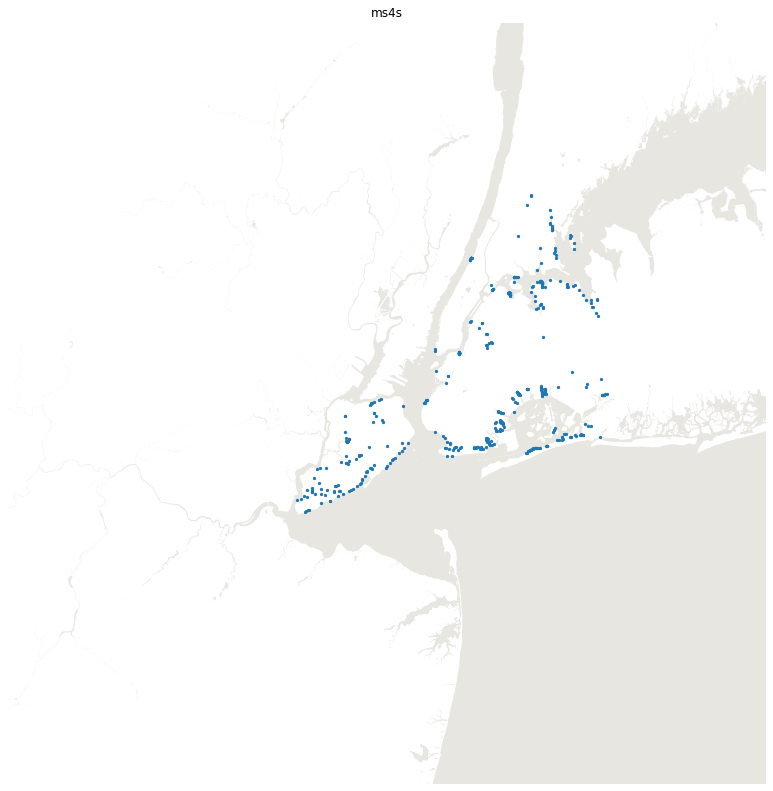

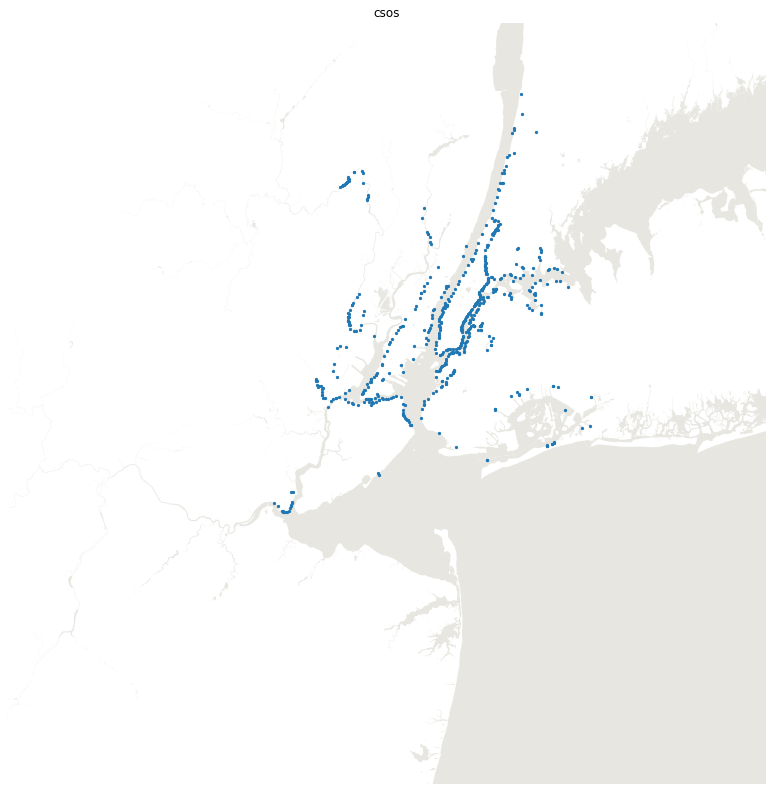

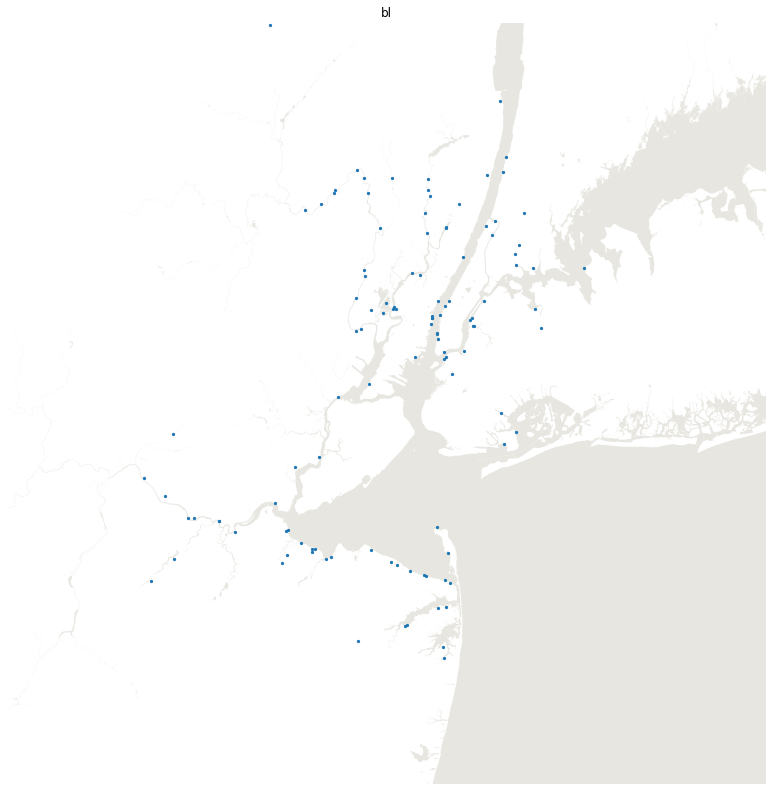

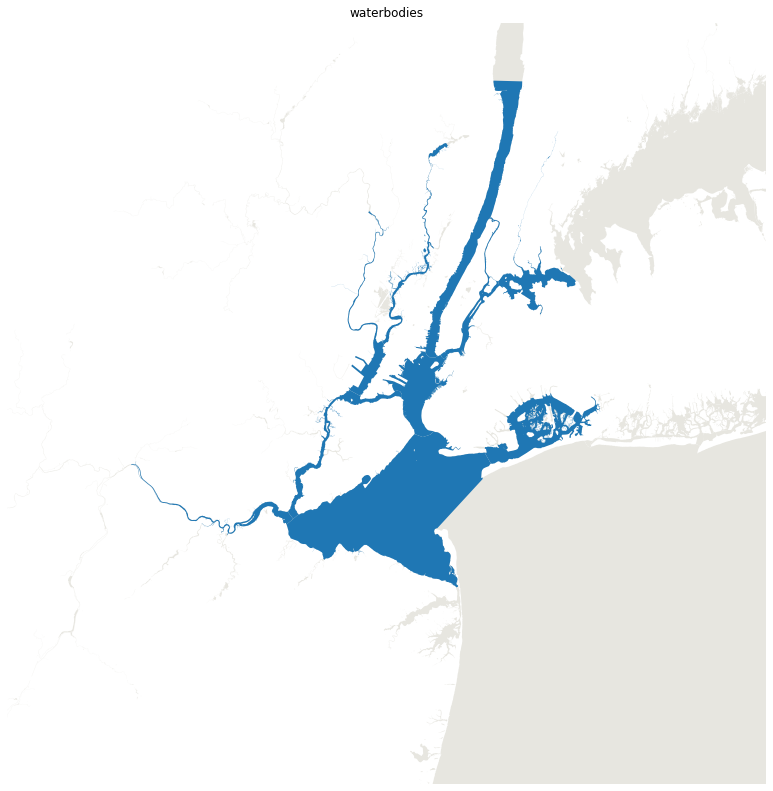

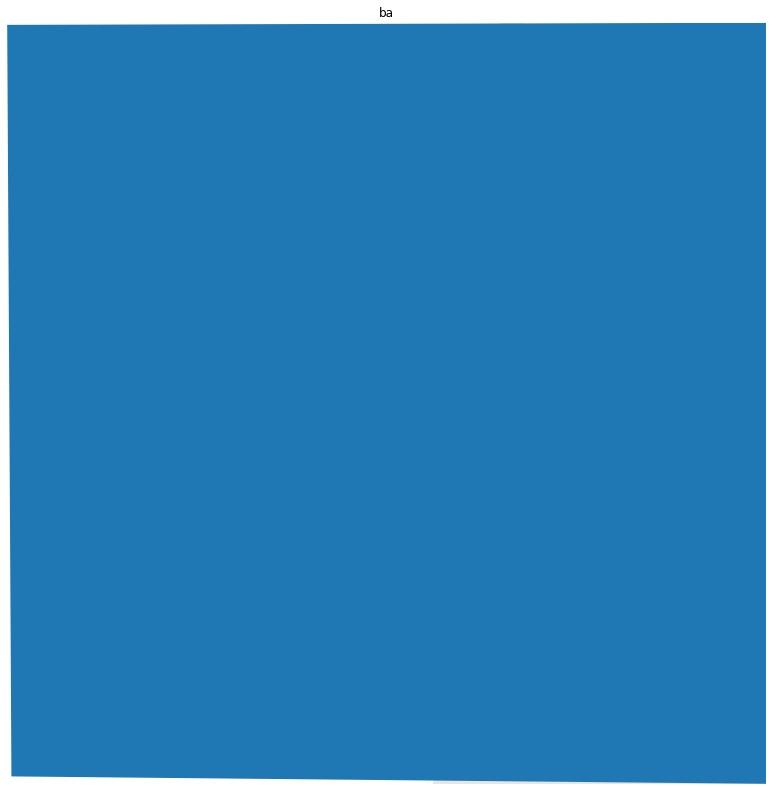

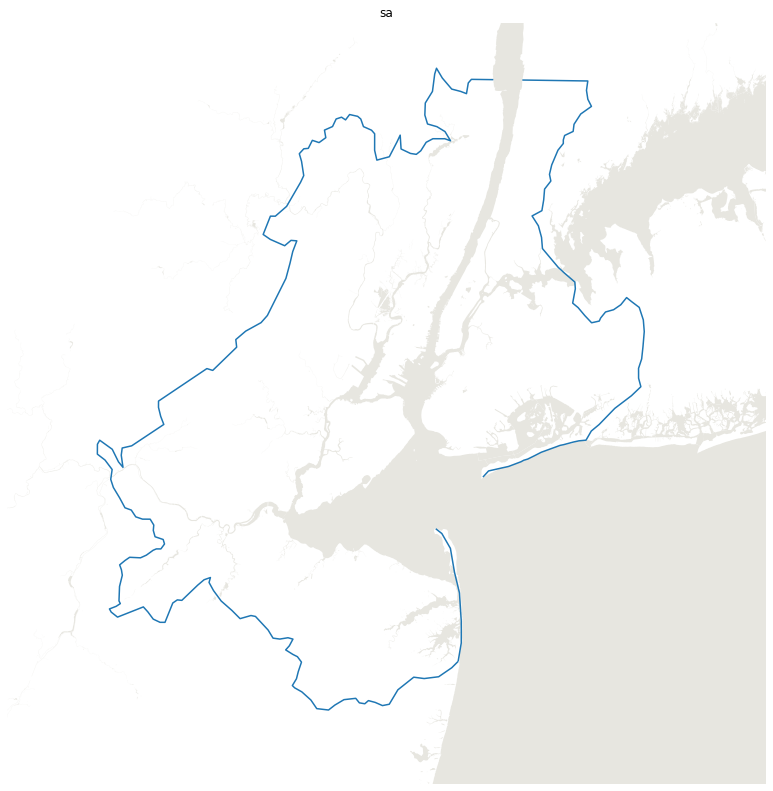

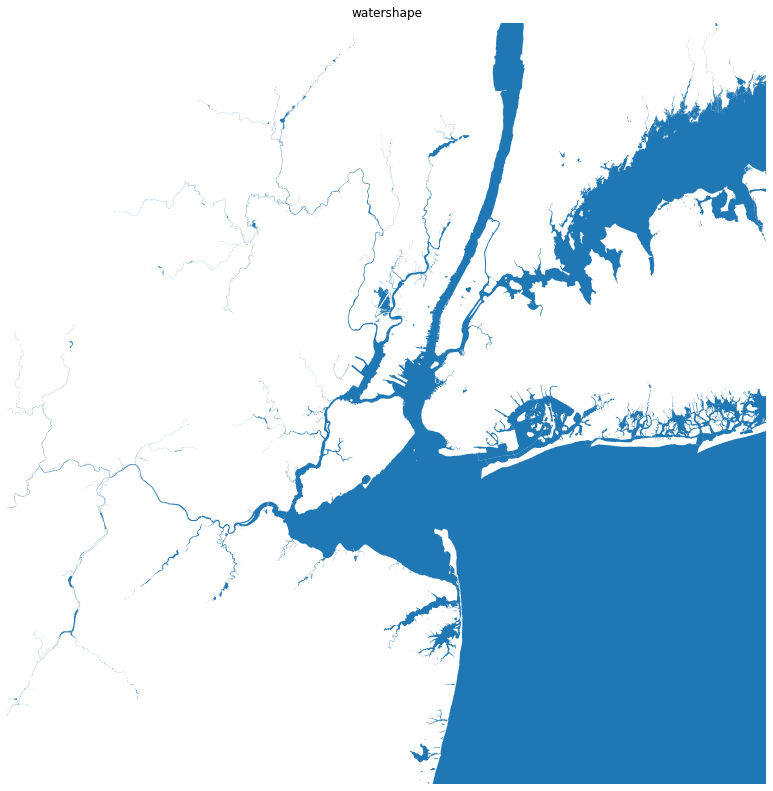

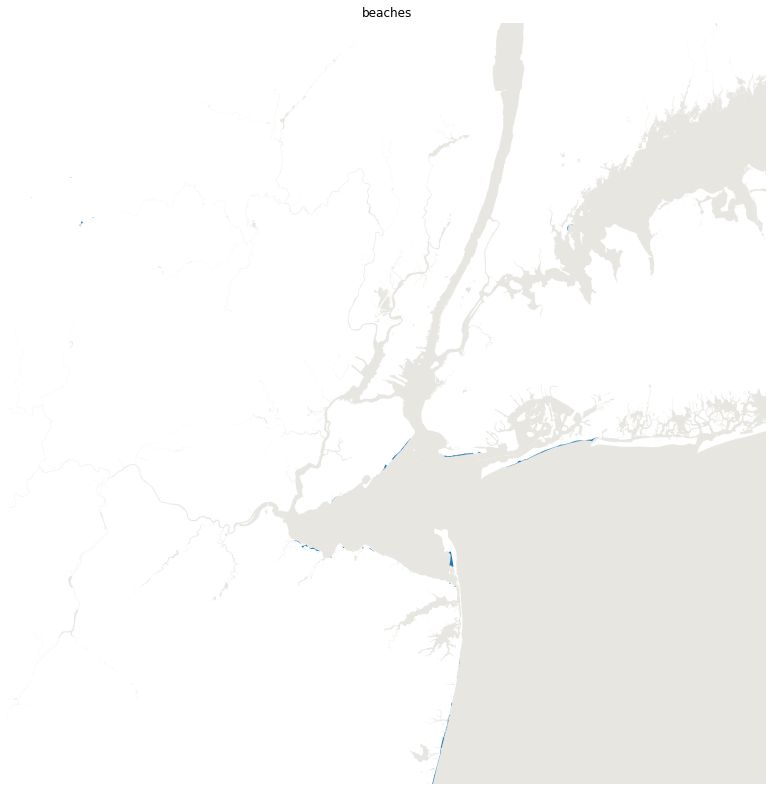

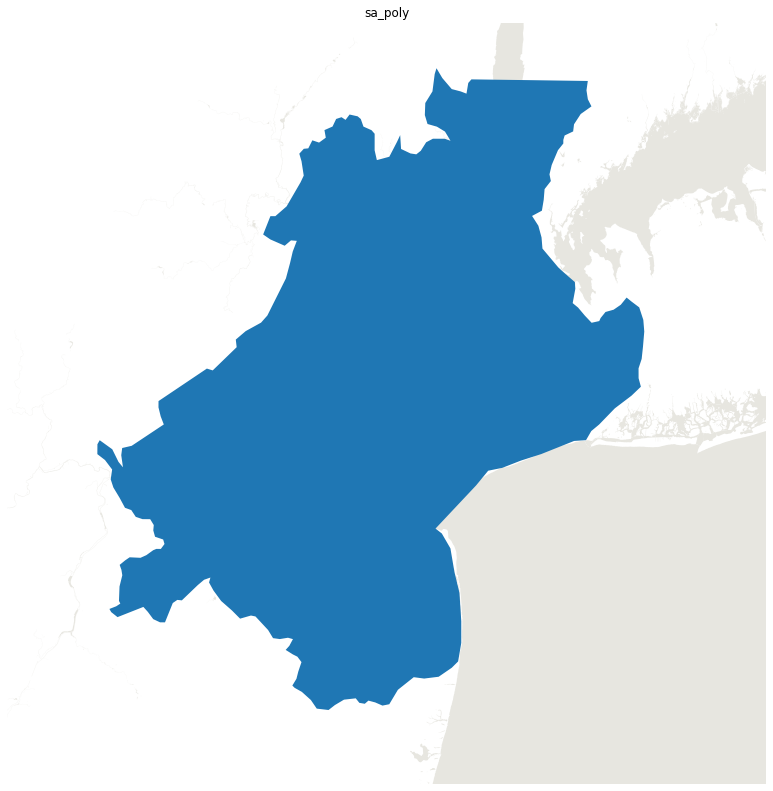

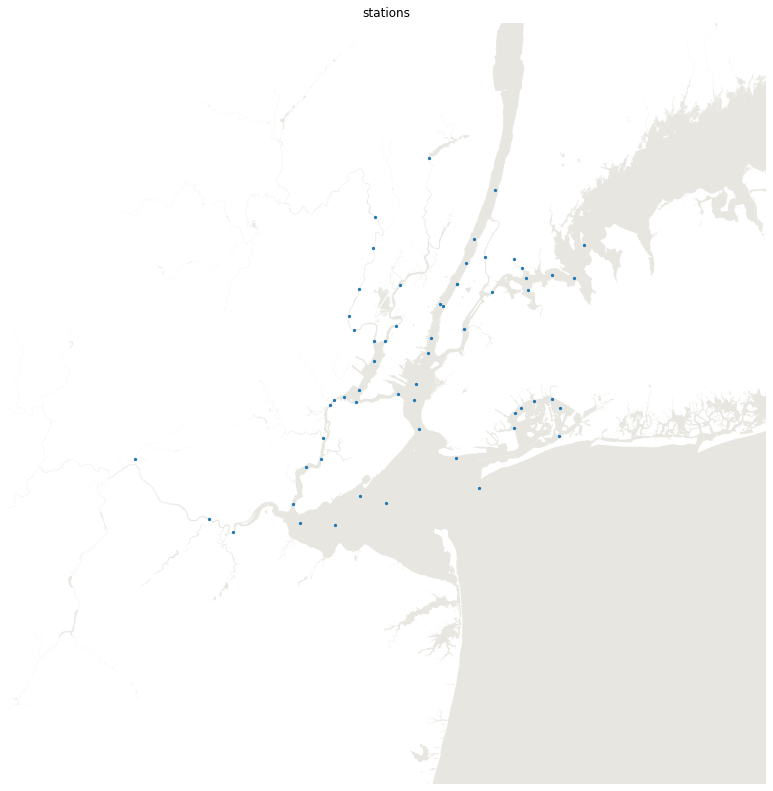

In [17]:
colors={
    'grey1': '#e7e6e0', 
    'grey2': '#C7C3BB',
    'grey3':'#B9B3AA',
    'grey4': '#56524A',
    'hab_g': '#93C15C',
    'wq_bl': '#4fa4e3',
    'mt_p': '#A95A9B',
    'ce_or': '#fcb103',
    'cc_y': '#E3BE3A',
    'hep_r': '#fc5203'    
}
#fig, ax = plt.subplots(figsize = (10,10))

for k, v in data.items():
    gdf = data[k]['gdf']
    fig, ax = plt.subplots(figsize=(14, 14))
#    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
    ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

    watershape.plot(
        ax = ax,
        facecolor = colors['grey1']
    )
    gdf.plot(
        ax = ax,
        #color = colors
        markersize = 5
    )
#     plt.subplot(gdf))
    plt.title(k)

    #plt.grid(False)
    ax.axis('off')
    plt.savefig(f'../img/{k}.png')  
    plt.show()

## Small Multiples to see all gdfs at once

<ipython-input-14-28ca34867ee9>:8: UserWarning: sharex argument to subplots() was an integer.  Did you intend to use subplot() (without 's')?
  ax = plt.subplots(3, 3, plot_number)


ValueError: 1 is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

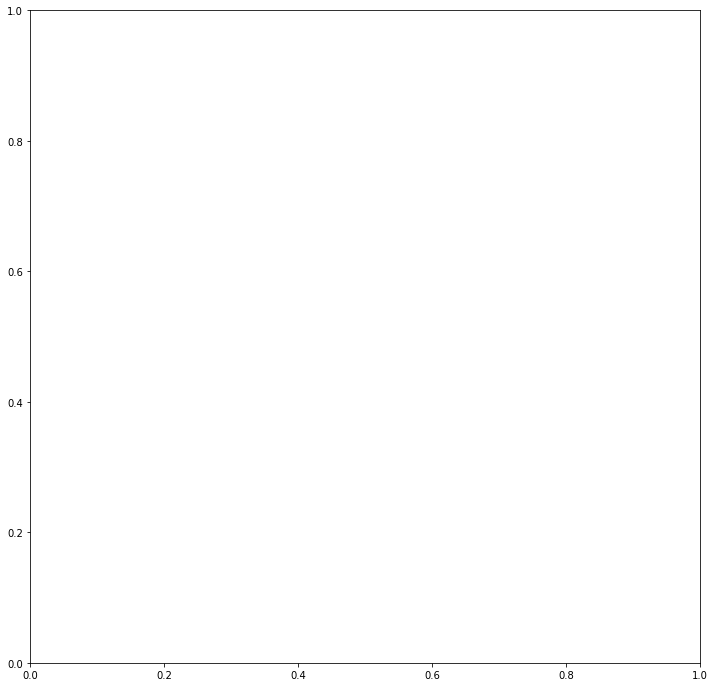

<Figure size 432x288 with 0 Axes>

In [14]:
ax = plt.subplots(3, 3, plot_number)

for k, v in data.items(): 
    gdf = data[k]['gdf']
    
    fig, ax = plt.subplots(figsize = (12,12))
    plot_number = 1
    #axes_list = [item for sublist in axes for item in sublist] # this line comes from an article about plotting small multiples with pandas
    # http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/
    
    #ax = axes_list.pop(0) # this too -- meant to set axes within grid?
    ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
    ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

    label = data[k]

    watershape.plot(
        ax = ax,
        facecolor = colors['grey1']
    )
    gdf.plot(
        ax = ax,
        markersize = 5
    )
    plot_number = plot_number + 1
    plt.subplots()
    plt.title(k)
    plt.grid(False)
    plt.tight_layout()
    
for ax in axes_list:
    ax.remove() 
    plt.show()
    ax.axis('off')
    
#     plt.savefig(f'../img/{k}.png') 

## plot data in same plot for processing and map building

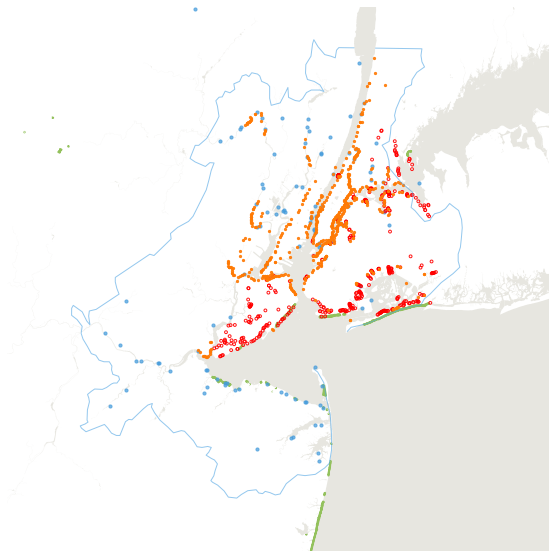

In [26]:
fig, ax = plt.subplots(figsize = (10,10))

colors={
    'grey1': '#e7e6e0', 
    'grey2': '#C7C3BB',
    'grey3':'#B9B3AA',
    'grey4': '#56524A',
    'hab_g': '#93C15C',
    'wq_bl': '#4fa4e3',
    'mt_p': '#A95A9B',
    'ce_or': '#fcb103',
    'cc_y': '#E3BE3A',
    'hep_r': '#fc5203'    
}

ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

watershape.plot(
    ax=ax,
    color='#e7e6e0',
)
#wb.plot(
#     ax=ax,
#     column = 'WB_name',
#     cmap='tab10'
# )

sa.plot(
    ax=ax,
    edgecolor=colors['wq_bl'],
    alpha=.6,
    linewidth=1,
    label='HEP Study Area',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',
    }
)
beaches.plot(
    ax=ax,
    facecolor='#93C15C',
    edgecolor='#93C15C',
    linewidth=2,
    label='Bathing Beach',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',
    }
)
bl.plot(
    ax = ax,
    facecolor = '#449bdb',
    alpha = .7,
    markersize =10,
    label = 'Boat launch',
    legend_kwds = {
        'frameon': False,
        'loc': 'upper left',        
    }
)
ms4s.plot(
    ax = ax,
    markersize = 8,
#    marker = "^",
    # try using ** 
    #**style_kwdsdict = {edgecolor : , facecolor : , linewidth : }
    facecolor = 'None',
    edgecolor ='red',
    alpha = .9,
    legend = True,
    label ='MS4 Outfall',
    legend_kwds = {
        'frameon': False,
        'loc' : 'upper left',
    }
)
csos.plot(
    ax = ax,
    color = '#ff7a05',
    markersize = 5,
    alpha = .9,
    label ='CSO',
    legend_kwds = {
        'frameon': False,
        'loc': 'upper left',
    }
)
ax.axis('off');



## plot waterbodies polygons in different colors (sampling regions)

In [1]:
waterbodies.head(1)

NameError: name 'waterbodies' is not defined

## create custom color list for categorical map
Passing a list to the colors parameter with geopandas works for plotting with custom colors. So creating a list of those colors may work as well. 
- seems that the list needs to contain the same number of colors as there are features to color
- another option is to add a column to the data with the colors in it

In [34]:
waterbodies['WB_name']

0                                  Lower Bay
1    Bronx River & Western Long Island Sound
2                           Hackensack River
3                         Lower Hudson River
4                 Passaic River & Newark Bay
5                Arthur Kill & Kill van Kull
6                         Upper New York Bay
7                  East River & Harlem River
8                  Jamaica Bay & Tributaries
9                        Lower Raritan River
Name: WB_name, dtype: object

Lower Raritan: #48823A  
Arthur Kill: #5AA846  
Passaic and Newark Bay: #93C25C  
Hackensack River: #93C25C  

Lower Bay: #B2CDE8  
Upper NY Bay: #3B89C3  
Lower Hudson River: #88B1DC  

Jamaica Bay: #A06ABA  
Harlem River and East River: #8A3E99  
Bronx River and Western Long Island: #CDB1DB  

Sample station orange dark: #ED7711  
sample station yellow: #FFC306  
dark grey: #7B756B (alpha .5)  

In [50]:
colors = ['#B2CDE8', '#CDB1DB','#93C25C','#88B1DC','#93C25C','#5AA846','#3B89C3','#8A3E99','#A06ABA','#48823A']
waterbodies['colors'] = colors

In [51]:
waterbodies.head()

,Id,OBJECTID,SHAPE_AREA,SHAPE_LEN,id_2,WB_name,region,geometry,colors
0,0,0,0.0,0.0,1,Lower Bay,Shared Waters,"MULTIPOLYGON (((978681.049 112032.674, 978681....",#B2CDE8
1,0,0,0.0,0.0,2,Bronx River & Western Long Island Sound,New York,"MULTIPOLYGON (((1034303.419 294831.039, 103424...",#CDB1DB
2,0,0,0.0,0.0,3,Hackensack River,New Jersey,"MULTIPOLYGON (((979608.774 288743.575, 979613....",#93C25C
3,0,0,0.0,0.0,4,Lower Hudson River,Shared Waters,"MULTIPOLYGON (((1020688.601 319275.127, 102063...",#88B1DC
4,0,0,0.0,0.0,5,Passaic River & Newark Bay,New Jersey,"MULTIPOLYGON (((938731.341 178537.969, 938769....",#93C25C


In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Open Sans"

In [45]:
colors = ['#C7C3BB','#B9B3AA','#56524A','#93C15C','#4fa4e3','#A95A9B', '#fcb103','#E3BE3A','#fc5203','#B9B3AA',]    


/Applications/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/plotting.py:508: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


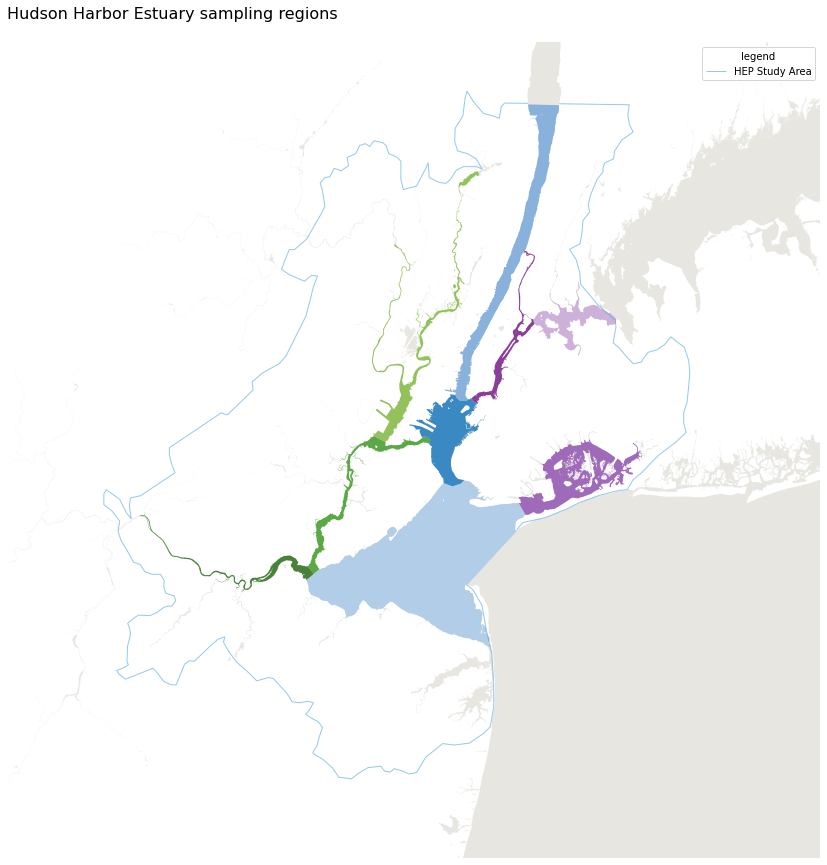

In [62]:
fig, ax = plt.subplots(figsize = (15,15))

# colors={
#     #'grey1': '#e7e6e0', 
#     'grey2': '#C7C3BB',
#     'grey3':'#B9B3AA',
#     'grey4': '#56524A',
#     'hab_g': '#93C15C',
#     'wq_bl': '#4fa4e3',
#     'mt_p': '#A95A9B',
#     'ce_or': '#fcb103',
#     'cc_y': '#E3BE3A',
#     'hep_r': '#fc5203'    
# }

ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

watershape.plot(
    ax = ax,
    color = '#e7e6e0',
)
waterbodies.plot(
    column = 'WB_name',
    categorical = True,
    color = colors,
    legend = True,
#     legend_kwds = {
#         #'bbox_to_anchor': (0, .98),
#         'fontsize' : 10,
#         'frameon' : False,
#         'loc':'upper left'},
    ax = ax
)
sa.plot(
    ax = ax,
    edgecolor = '#4fa4e3',
    alpha = .6,
    linewidth = 1,
    label='HEP Study Area',
#     legend = True,
#     legend_kwds = {
#         'frameon': False,
#         'loc': 'upper left',
   # }
)

ax.axis('off');
ax.set_title('Hudson Harbor Estuary sampling regions\n',
             fontsize = 16, 
             loc = 'left')
ax.legend(title="legend")
plt.savefig('../img/sampling regions.pdf')

### clip data to study area

In [40]:
beaches_clipped = geopandas.overlay(
    sa_poly, 
    beaches, 
    how='intersection',
)


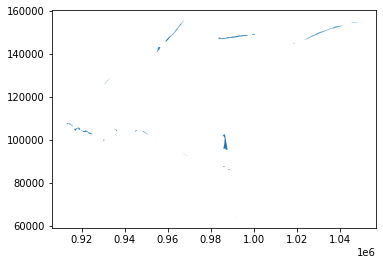

In [41]:
beaches_clipped.plot()
#ax.axis('off');

In [42]:
  beaches_clipped.to_file(f'../data/processing/HEP_beaches_polygons.shp')

In [43]:
bl_clipped = geopandas.overlay(
    bl, 
    sa_poly, 
    how='intersection',
)

In [44]:
  bl_clipped.to_file(f'../data/processing/HEP_boatlaunches_clipped.shp')

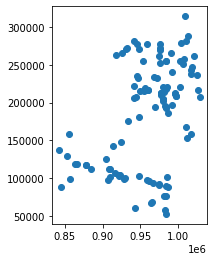

In [45]:
bl_clipped.plot()

### buffer data to use for selecting polution sources within .5 miles

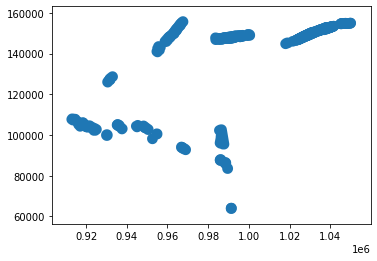

In [46]:
beaches_buffer = beaches_clipped.copy()
beaches_buffer['geometry']=beaches_buffer.buffer(2600)
beaches_buffer.plot();

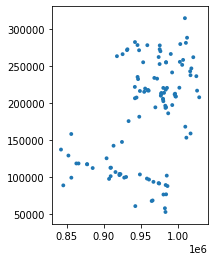

In [47]:
bl_buffer = bl_clipped.copy()
bl_buffer['geometry']=bl_clipped.buffer(2600)
bl_buffer.plot();

### select CSOs and MS4 points that are within 1/2 mile of beach and/or boat launch

In [48]:
beaches_buffer['ms4s']=1
ms4_at_beaches_buffer_sj = gpd.sjoin(ms4s,beaches_buffer, how="left", op='intersects')


In [49]:
ms4s_on_beaches=ms4_at_beaches_buffer_sj[ms4_at_beaches_buffer_sj['ms4s']==1]

In [50]:
ms4s_on_beaches.tail()

,OBJECTID_left,ID,WATERBODY,OUTFALLTYP,FLOATABLES,PATHOGENS,NITROGEN,PHOSPHORUS,BORO,TREATMENT_,...,beaches,borough,gispropnum,name,shape_star,shape_stle,system,layer,path,ms4s
448,449.0,ROC-1202,GRASS HASSOCK CHANNEL,MS4 OUTFALL,Yes,Yes,Yes,No,QUEENS,ROCKAWAY,...,None,Q,Q050,Rockaway Beach,113022.153717,1404.374602,Q050-ZN08A-BCH0015,geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085,/Users/saraeichner/Dropbox/HEP_DataExploration...,1.0
448,449.0,ROC-1202,GRASS HASSOCK CHANNEL,MS4 OUTFALL,Yes,Yes,Yes,No,QUEENS,ROCKAWAY,...,None,Q,Q050,Rockaway Beach,116896.566864,1430.754838,Q050-ZN08A-BCH0016,geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085,/Users/saraeichner/Dropbox/HEP_DataExploration...,1.0
448,449.0,ROC-1202,GRASS HASSOCK CHANNEL,MS4 OUTFALL,Yes,Yes,Yes,No,QUEENS,ROCKAWAY,...,None,Q,Q163,Rockaway Beach,134442.079590,1633.442615,Q163-ZN07B-BCH0017,geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085,/Users/saraeichner/Dropbox/HEP_DataExploration...,1.0
448,449.0,ROC-1202,GRASS HASSOCK CHANNEL,MS4 OUTFALL,Yes,Yes,Yes,No,QUEENS,ROCKAWAY,...,None,Q,Q163,Rockaway Beach,88043.078064,1228.242815,Q163-ZN07B-BCH0018,geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085,/Users/saraeichner/Dropbox/HEP_DataExploration...,1.0
448,449.0,ROC-1202,GRASS HASSOCK CHANNEL,MS4 OUTFALL,Yes,Yes,Yes,No,QUEENS,ROCKAWAY,...,None,Q,Q163,Rockaway Beach,197550.987289,1996.955878,Q163-ZN07B-BCH0013,geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085,/Users/saraeichner/Dropbox/HEP_DataExploration...,1.0


/Applications/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/plotting.py:508: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


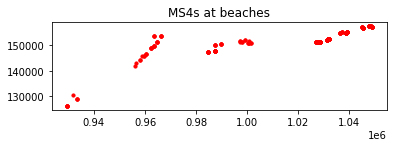

In [51]:
ms4s_on_beaches.plot(
column='ms4s on beaches', color='red', markersize = 10)
plt.title('MS4s at beaches');

In [52]:
beaches_buffer['csos']=1
csos_at_beaches_buffer_sj_cso = gpd.sjoin(csos,beaches_buffer, how="left", op='intersects')

In [53]:
csos_on_beaches=csos_at_beaches_buffer_sj_cso[csos_at_beaches_buffer_sj_cso['csos']==1]

/Applications/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/plotting.py:508: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


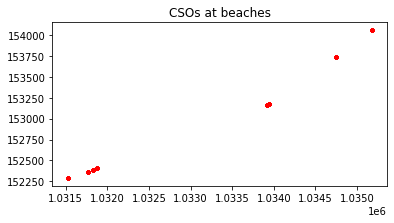

In [54]:
csos_on_beaches.plot(
column='csos on beaches', color='red', markersize = 10)
plt.title('CSOs at beaches');

In [55]:
bl_buffer['ms4']=1
ms4_at_launches_buffer_sj = gpd.sjoin(ms4s,bl_buffer, how="left", op='intersects')

In [56]:
ms4_at_launches=ms4_at_launches_buffer_sj[ms4_at_launches_buffer_sj['ms4']==1]

/Applications/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/plotting.py:508: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


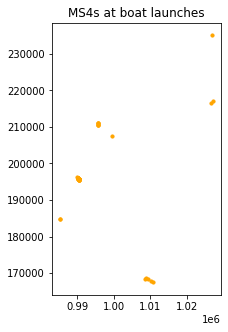

In [57]:
fig, ax = plt.subplots(figsize = (5,5))
ms4_at_launches.plot(
    ax=ax,
    column='ms4',
    color='orange', 
    markersize = 10,
)
plt.title('MS4s at boat launches');

In [58]:
bl_buffer['csos']=1
csos_in_launches_buffer_sj_cso = gpd.sjoin(csos,bl_buffer, how="left", op='intersects')

In [59]:
csos_inbuffer=csos_in_launches_buffer_sj_cso[csos_in_launches_buffer_sj_cso['csos']==1]

/Applications/anaconda3/envs/geospatial/lib/python3.8/site-packages/geopandas/plotting.py:508: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


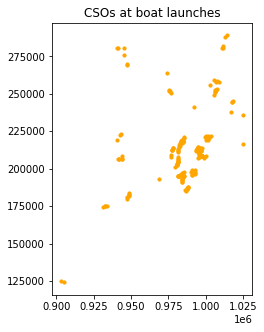

In [60]:
fig, ax = plt.subplots(figsize = (5,5))
csos_inbuffer.plot(
    ax=ax,
    column='csos', 
    color='orange', 
    markersize = 10)
plt.title('CSOs at boat launches');

## style data to show findings

In [61]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Open Sans"

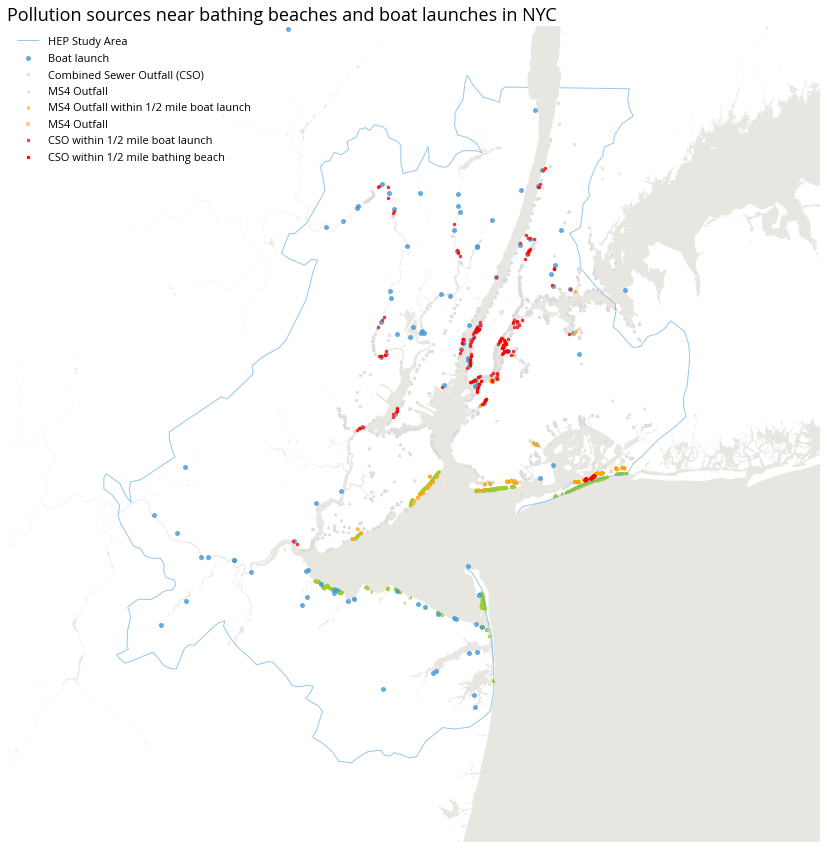

In [66]:
colors={
    'grey1': '#e7e6e0', 
    'grey2': '#C7C3BB',
    'grey3':'#B9B3AA',
    'grey4': '#56524A',
    'hab_g': '#93C15C',
    'wq_bl': '#4fa4e3',
    'mt_p': '#A95A9B',
    'ce_or': '#fcb103',
    'cc_y': '#E3BE3A',
    'hep_r': '#fc5203'    
}


fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

watershape.plot(
    ax=ax,
    facecolor='#e7e6e0'
),
sa.plot(
    ax=ax,
    edgecolor=colors['wq_bl'],
    alpha=.6,
    linewidth=1,
    label='HEP Study Area',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',
    }
),
beaches_clipped.plot(
    ax=ax,
    facecolor='yellowgreen',
    edgecolor='yellowgreen',
    linewidth=3,
    label='Bathing Beach',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',
    }
), 
bl.plot(
    ax=ax,
    facecolor='#449bdb',
    alpha=.8,
    markersize=15,
    label='Boat launch',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',        
    }
)
csos.plot(
    ax=ax,
    markersize=6,
    alpha=.8,
    color='gainsboro',
    legend=True,
    label='Combined Sewer Outfall (CSO)',
),

ms4s.plot(
    ax=ax,
    markersize=6,
    marker="^",
    color='gainsboro',
    alpha=.9,
    legend=True,
    label='MS4 Outfall',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',
    }
),   
ms4_at_launches.plot(
    ax=ax,
    markersize=7,
    marker="^",
    color='orange',
    alpha=.7,
    legend=True,
    label='MS4 Outfall within 1/2 mile boat launch',
    legend_kwds={
        'frameon':False,
        'loc': 'upper left',
    }
),
ms4s_on_beaches.plot(
    ax = ax,
    markersize = 7,
#    marker = "^",
    facecolor = 'None',
    edgecolor ='orange',
    alpha = .9,
    legend = True,
    label ='MS4 Outfall',
    legend_kwds = {
        'frameon': False,
        'loc' : 'upper left',
    }
),

csos_inbuffer.plot(
    ax=ax,
    markersize = 6,
    color='red',
    alpha=.7,
    legend=True,
    label='CSO within 1/2 mile boat launch'
),
csos_on_beaches.plot(
    ax=ax,
    markersize = 6,
    color='red',
    legend=True,
    label='CSO within 1/2 mile bathing beach',    
),


ax.legend(loc='upper left', frameon=False, fontsize= 11,),
ax.set_title('Pollution sources near bathing beaches and boat launches in NYC', loc='left', fontsize=18)
ax.axis('off');
plt.savefig('/Users/saraeichner/Dropbox/github/SAVI_python/python-project/img/polutionsources_recreation_estuary.pdf')